# Shape Measurement 101

This notebook has the first part of a small-ish tutorial on galaxy shape measurement. The goals of this tutorial are as follows

1. Become familiar with the concept of what we mean by a galaxy's shape.
2. Form an intuitive understand of what happens to an object's shape when it is sheared and then observed with a telescope.
3. Be able to use the `galsim` package to simulate this process.

In order to run the code in this tutorial, you will need the following packages installed locally

 - `galsim`
 - `numpy`
 - `matplotlib`
 
I suggest using `conda`. You can run the command

```
conda install galsim numpy metaplotlib
```

in your environment to get things going.


## A. Galaxy Surface Brightness Profiles

They key quantity we'll be working with in this tutorial is the *surface brightness* of a galaxy. This quantity can roughly be thought of as the value of an image of the galaxy as a function of the position in the galaxy. (There are of course more technical definitions but this definition is good enough for now.) We will call this quantity $I(x,y)$.

Here is a small snippet of code that draws a "galaxy" whose surface brightness profile is 1 if the distance from the center is less than 0.5 and zero otherwise.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'y')

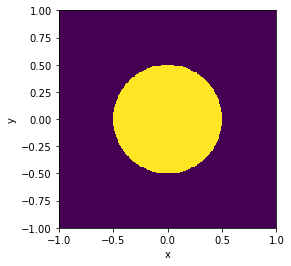

In [12]:
# this is the array of pixel edges so that pixel i
# zero goes from edges[i] to edges[i+1]
edges = np.linspace(-1, 1, 257)

# we use pixel centers to compute the profile and draw images
# the indexing edges[1:] removes the first element of the array
# the indexing edges[:-1] removes the last element of the array
# thus we are averaging the edges of each pixel to get the center
vals = (edges[:-1] + edges[1:])/2

# this command constructs 2d arrays of the x and y values across the image
# it is very useful!
x, y = np.meshgrid(vals, vals)

# now we compute the profile 
# and set it to 1 if the radius is less than 0.5
im = np.zeros((256, 256))
r = np.sqrt(x*x + y*y)
msk = r < 0.5
im[msk] = 1

# this set of commands makes a plot of the object
fig, axs = plt.subplots()
axs.pcolormesh(edges, edges, im, cmap='viridis')
axs.grid(False)
axs.set_aspect(1.0)
axs.set_xlabel("x")
axs.set_ylabel("y")

## B. How do we define the shape of a galaxy?

There are a lot of ways to think about this question, but let's start with the simplest and one of the most common, weighted moments. We define the *moments* of the surface brightness profile as:

$$
\langle M_x\rangle = \frac{\int I(x,y) x}{\int I(x,y)}
$$


$$
\langle M_y\rangle = \frac{\int I(x,y) y}{\int I(x,y)}
$$


$$
\langle M_{xx}\rangle = \frac{\int I(x,y) (x - M_x)^2}{\int I(x,y)}
$$


$$
\langle M_{xy}\rangle = \frac{\int I(x,y) (x - M_x)(y-M_y)}{\int I(x,y)}
$$


$$
\langle M_{yy}\rangle = \frac{\int I(x,y) (y - M_y)^2}{\int I(x,y)}
$$

For those of you who have studied statistics, you'll recognize these as the mean ($M_x$, $M_y$), variance ($M_{xx}$, $M_{yy}$), and covariance ($M_{xy}$). However, you do not need to be deeply familiar with these concepts in order to continue with this tutorial.

### Exercise 1: Compute the Moments!

In this exercise, we are going to compute the moments of simplified version of a Gaussian surface brightness profile. This simplified profile is

$$
I(x,y) \propto \exp\left(-\frac{(x - \mu_x)^2}{2\sigma_x^2} - \frac{(y - \mu_y)^2}{2\sigma_y^2}\right)
$$

The exercise is to do the following.

1. Write a function to compute the profile at a given position.
2. Use `matplotlib` to visualize that profile.
3. Compute the moments of the profile.

Use values $\sigma_x = 0.5$, $\sigma_y = 0.25$, $\mu_x=-0.2$, $\mu_y=0.3$. 

Here are some questions to answer:

1. As you change $\sigma_x$ and $\sigma_y$, what relationship do you notice between the moments and those values?
2. As you change $\mu_x$ and $\mu_y$, what relationship do you notice between the moments and those values?
3. What is the behavior of $M_{xy}$ and why do you think it does that?

To help get you started, I have put some code below that sets up the coordinates and 2d arrays of them for doing computations and plots. You do not have to use these, but you may find them helpful.

Also, remember that an integral $V = \int_L^H dx f(x)$ can be estimated from a sum:

$$
V \approx \sum_i f(x_i) \Delta x
$$

where the $x_i$ have been defined on a suitable grid of points from $L$ to $H$ with spacing $\Delta x$.

$M_{p q}=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} x^{p} y^{q} f(x, y) d x d y$

In [13]:
x_min = -2.0
x_max = 2.0
y_min = -2.0
y_max = 2.0

edges = np.linspace(x_min, x_max, 513)
vals = (edges[:-1] + edges[1:])/2
x, y = np.meshgrid(vals, vals)

mu_x, sigma_x = -0.2, 0.5
mu_y, sigma_y = 0.3, 0.25

def bi_gaussian(x,y,mu_x,sigma_x,mu_y,sigma_y):
    return np.exp(-(x-mu_x)**2/(2*sigma_x**2) - (y-mu_y)**2/(2*sigma_y**2))

In [14]:
im = bi_gaussian(x,y,mu_x,sigma_x,mu_y,sigma_y)

In [15]:
import skimage

def get_moments(im, x,y, verbose=False):
    
    # M = skimage.measure.moments_central(im,order=2)
        
    M_0 = np.sum(im)
    
    M_x = np.sum(x*im) / M_0
    M_y = np.sum(y*im) / M_0
    
    M_xx = np.sum((x-M_x)**2 * im) / M_0    
    M_yy = np.sum((y-M_y)**2 * im) / M_0    
    M_xy = np.sum((x-M_x) * (y-M_y) * im) / M_0    

    return((M_x,M_y,M_xx,M_xy,M_yy))

M_x, M_y, M_xx, M_xy, M_yy = get_moments(im,x,y, verbose=True)
print(M_x,M_y,M_xx,M_xy,M_yy)

-0.1997065068836582 0.29999999999093935 0.24942173065729248 -6.342013819600422e-19 0.062499999984595545


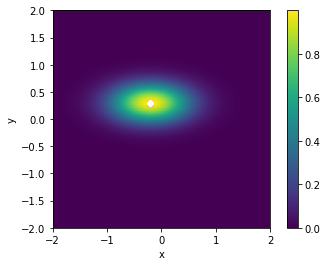

In [16]:
# this set of commands makes a plot of the object
fig, axs = plt.subplots()
cf = axs.pcolormesh(edges, edges, im, cmap='viridis')
axs.grid(False)
axs.set_aspect(1.0)
axs.set_xlabel("x")
axs.set_ylabel("y")
plt.scatter(mu_x,mu_y,color='r')
plt.scatter(M_x,M_y, color="w")
fig.colorbar(cf,ax=axs)

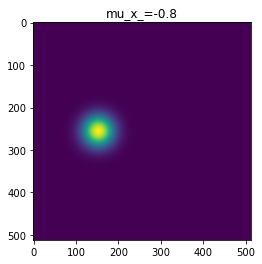

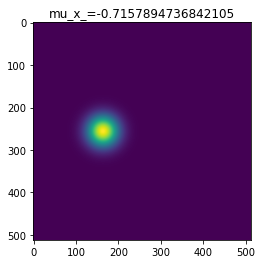

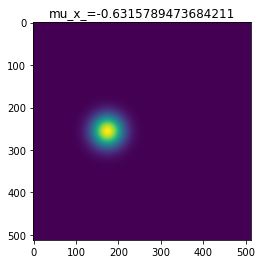

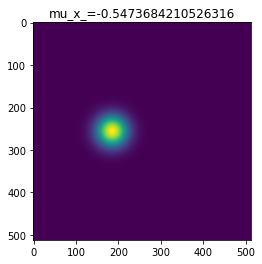

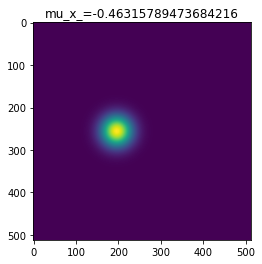

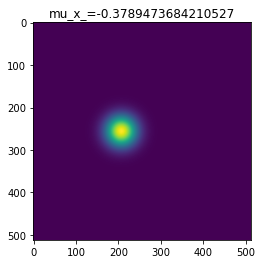

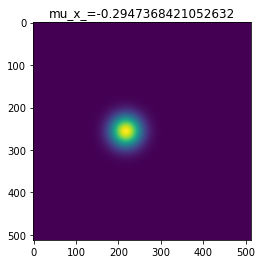

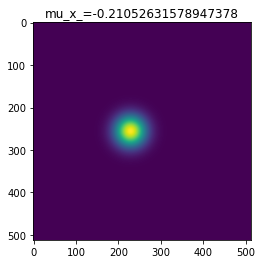

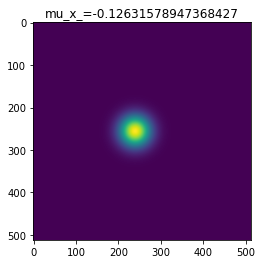

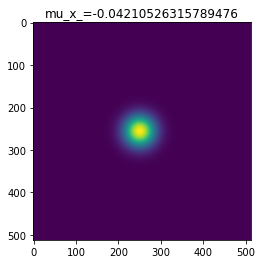

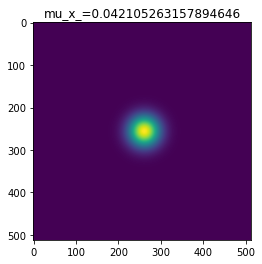

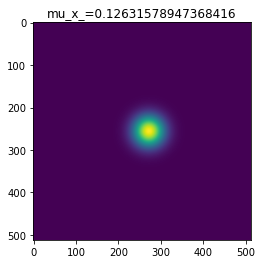

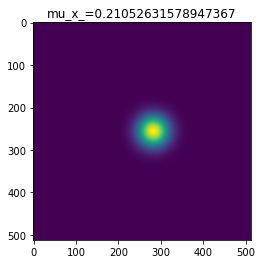

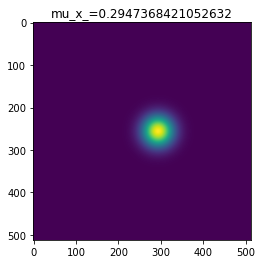

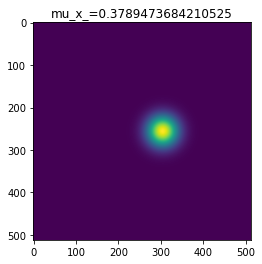

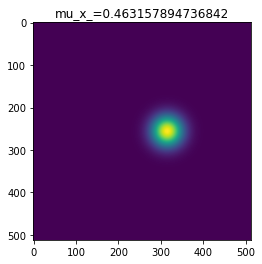

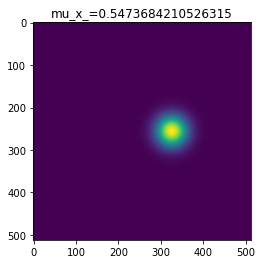

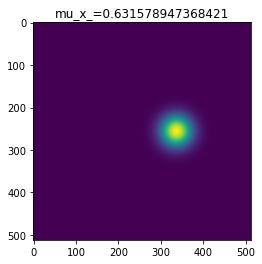

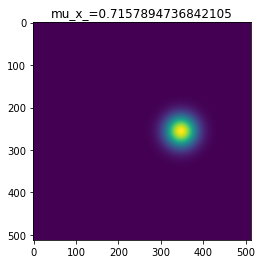

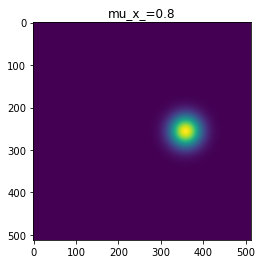

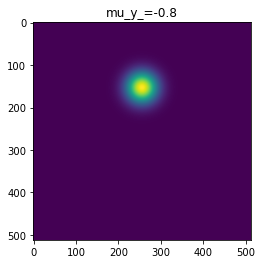

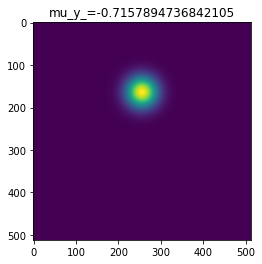

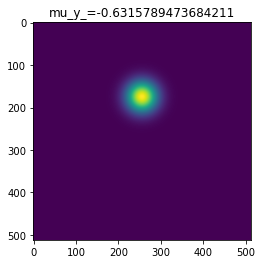

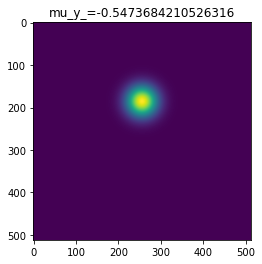

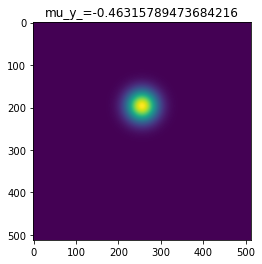

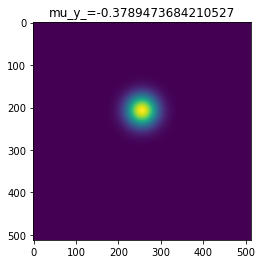

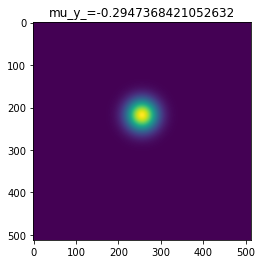

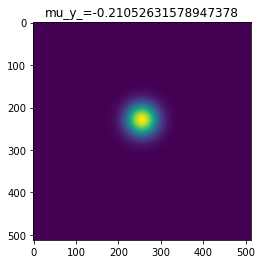

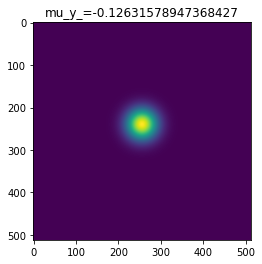

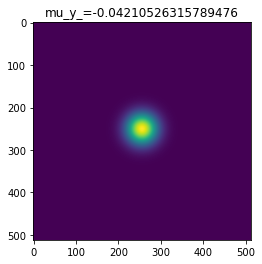

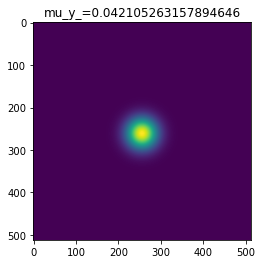

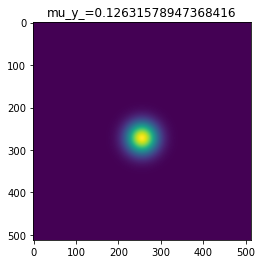

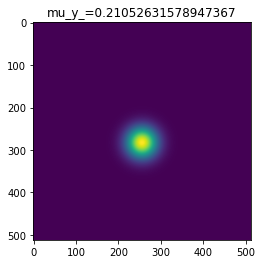

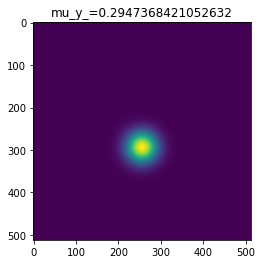

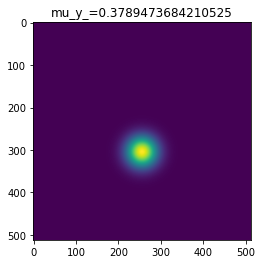

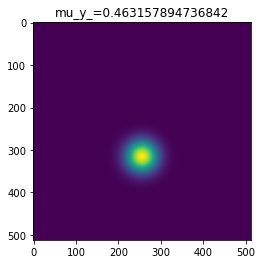

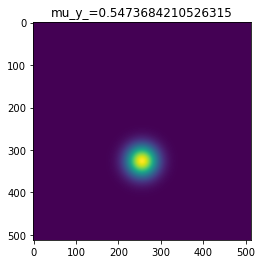

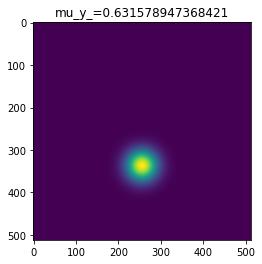

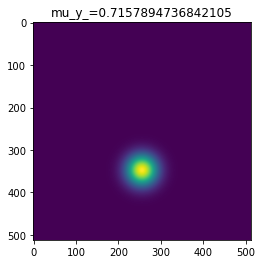

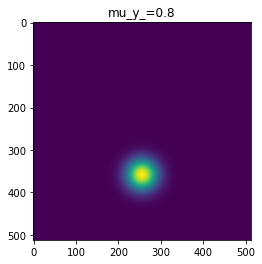

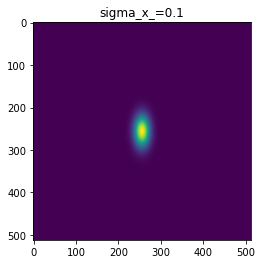

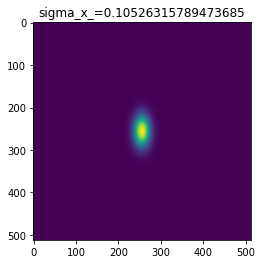

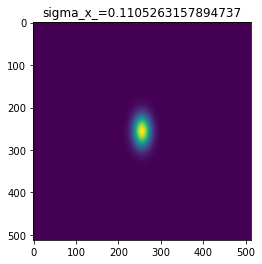

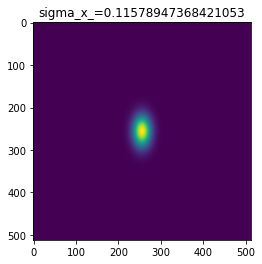

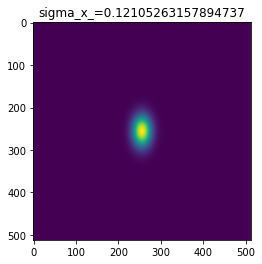

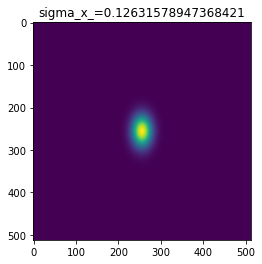

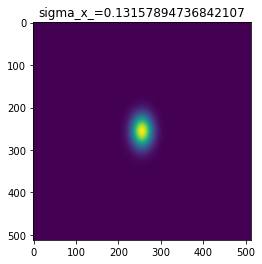

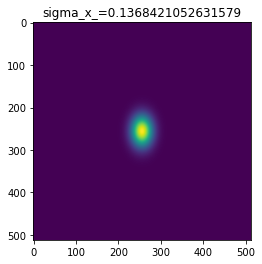

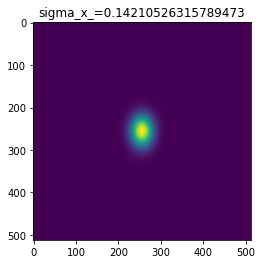

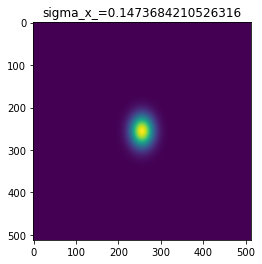

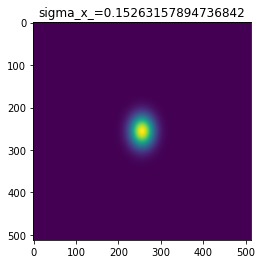

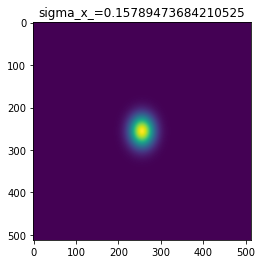

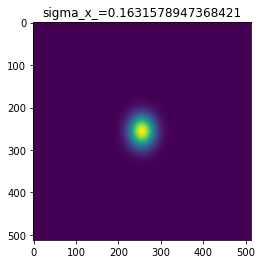

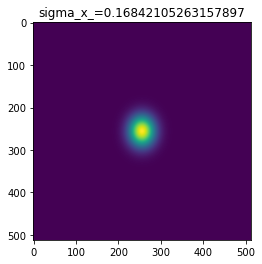

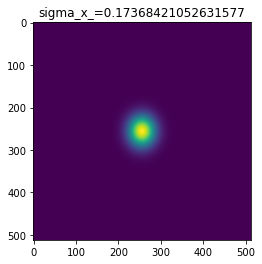

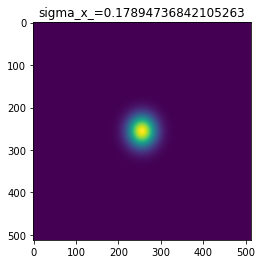

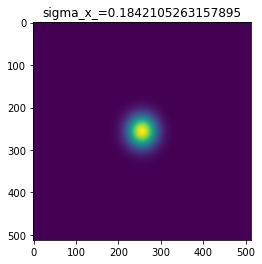

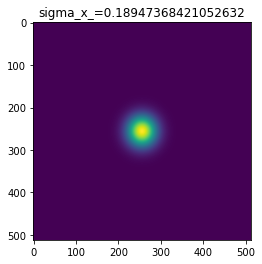

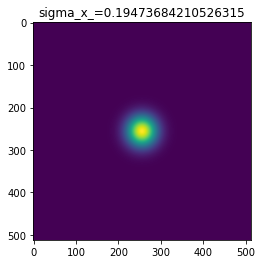

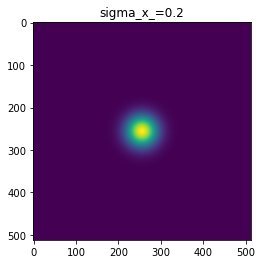

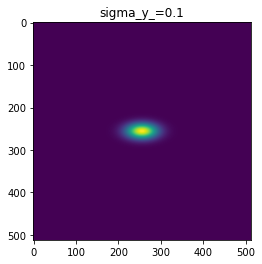

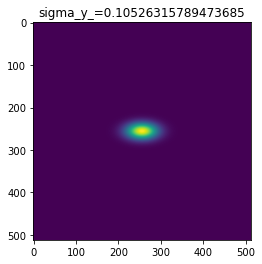

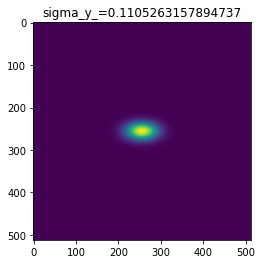

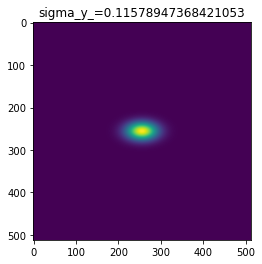

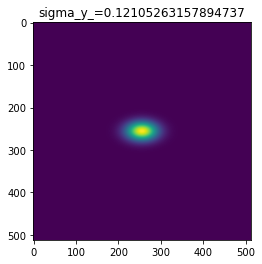

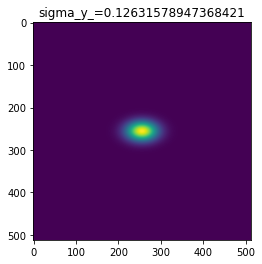

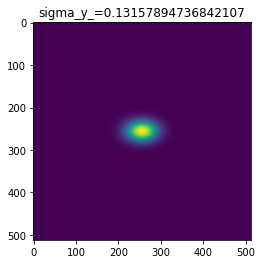

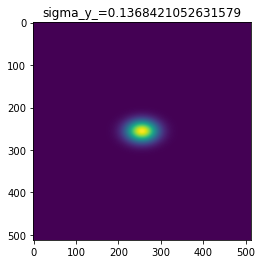

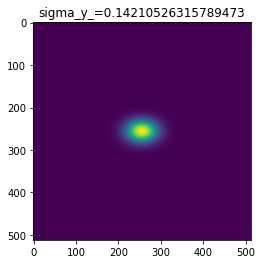

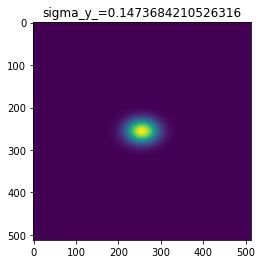

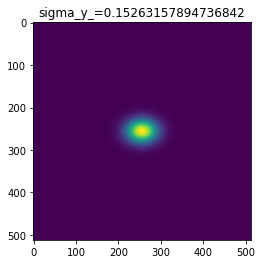

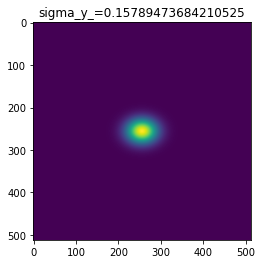

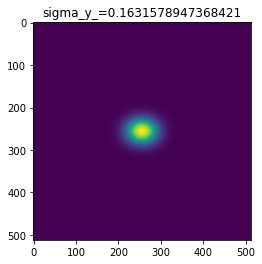

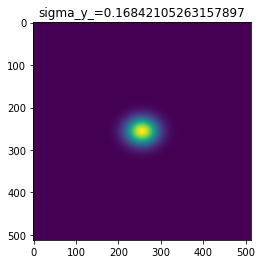

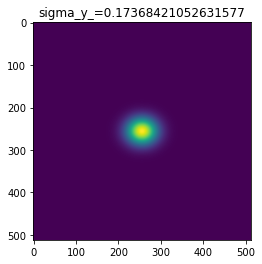

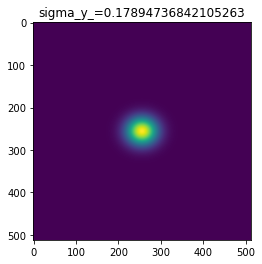

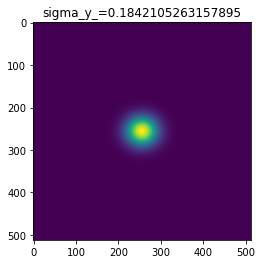

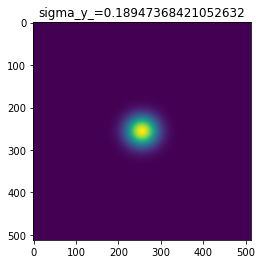

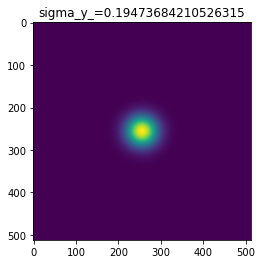

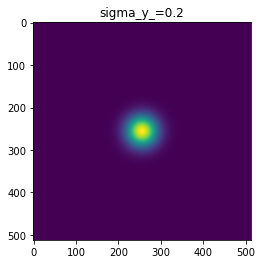

In [17]:
mu_x_range = np.linspace(-0.8,0.8,20)
mu_y_range = np.linspace(-0.8,0.8,20)
sig_x_range = np.linspace(0.1,0.2,20)
sig_y_range = np.linspace(0.1,0.2,20)

mu_x, sigma_x = 0, 0.2
mu_y, sigma_y = 0, 0.2

im_list = [] 
M_list_d_mu_x = []
M_list_d_mu_y = []
M_list_d_sig_x = []
M_list_d_sig_y = []

for mu_x_ in mu_x_range:
    im = bi_gaussian(x,y,mu_x_,sigma_x,mu_y,sigma_y)
    im_list.append(im)
    plt.imshow(im)
    plt.title(f"{mu_x_=}")
    plt.show()
    moments = get_moments(im,x,y)
    M_list_d_mu_x.append(moments)

for mu_y_ in mu_y_range:
    im = bi_gaussian(x,y,mu_x,sigma_x,mu_y_,sigma_y)
    im_list.append(im)
    plt.imshow(im)
    plt.title(f"{mu_y_=}")
    plt.show()
    moments = get_moments(im,x,y)
    M_list_d_mu_y.append(moments)

for sigma_x_ in sig_x_range:
    im = bi_gaussian(x,y,mu_x,sigma_x_,mu_y,sigma_y)
    im_list.append(im)
    plt.imshow(im)
    plt.title(f"{sigma_x_=}")
    plt.show()
    moments = get_moments(im,x,y)
    M_list_d_sig_x.append(moments)

for sigma_y_ in sig_y_range:
    im = bi_gaussian(x,y,mu_x,sigma_x,mu_y,sigma_y_)
    im_list.append(im)
    plt.imshow(im)
    plt.title(f"{sigma_y_=}")
    plt.show()
    moments = get_moments(im,x,y)
    M_list_d_sig_y.append(moments)
    
    
M_list_d_mu_x = np.array(M_list_d_mu_x)
M_list_d_mu_y = np.array(M_list_d_mu_y)
M_list_d_sig_x = np.array(M_list_d_sig_x)
M_list_d_sig_y = np.array(M_list_d_sig_y)


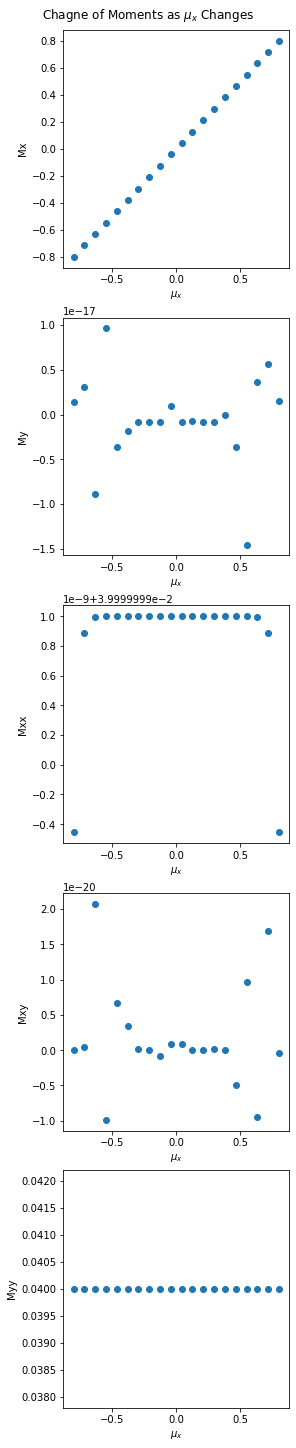

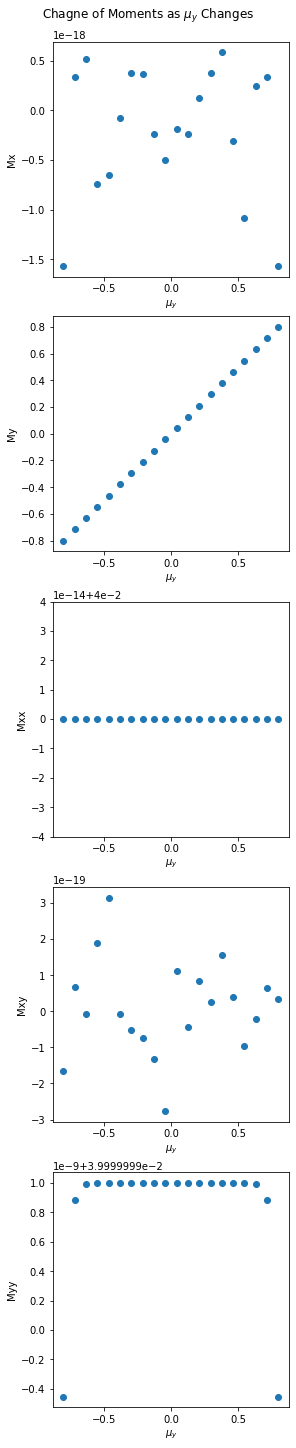

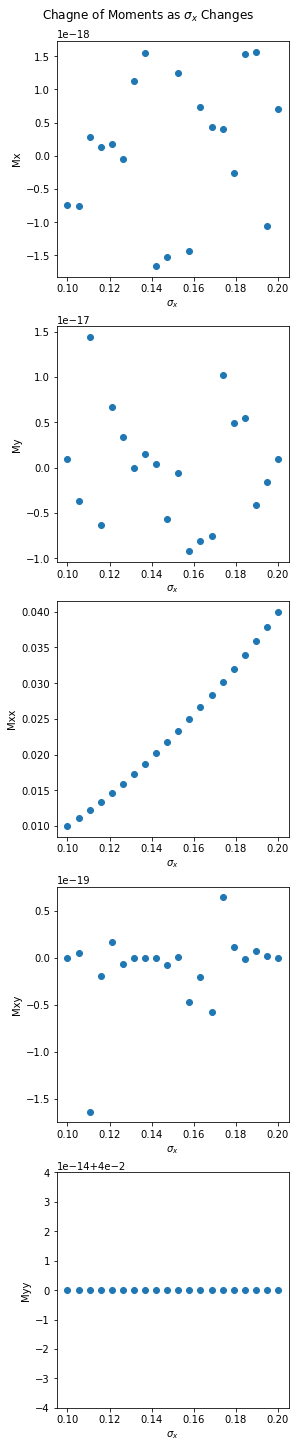

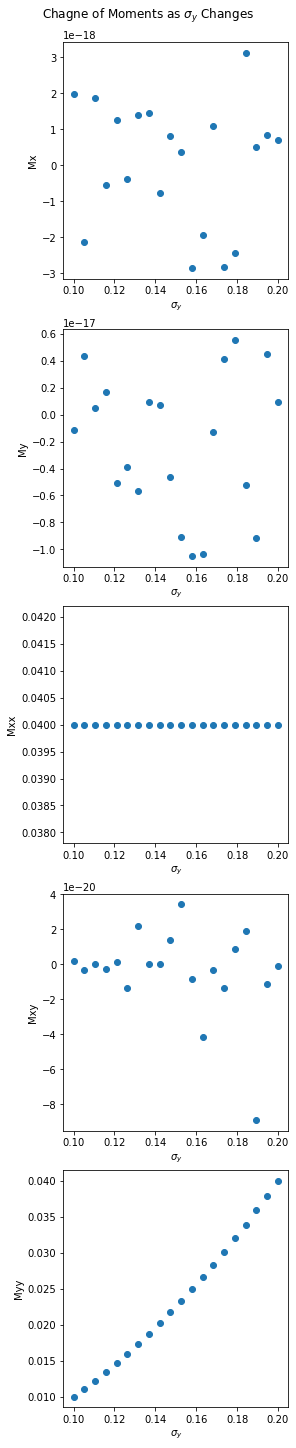

In [18]:
MOMENT_NAMES = ["Mx","My","Mxx","Mxy","Myy"]
FIG_SIZE = (4,20)
fig,axes = plt.subplots(5,1,figsize=FIG_SIZE,constrained_layout=True)
for i in range(5):
    axes[i].scatter(mu_x_range,M_list_d_mu_x[:,i])
    axes[i].set_ylabel(MOMENT_NAMES[i])
    axes[i].set_xlabel(r"$\mu_x$")
fig.suptitle("Chagne of Moments as $\mu_x$ Changes")
fig.show()

fig,axes = plt.subplots(5,1,figsize=FIG_SIZE,constrained_layout=True)
for i in range(5):
    axes[i].scatter(mu_y_range,M_list_d_mu_y[:,i])
    axes[i].set_ylabel(MOMENT_NAMES[i])
    axes[i].set_xlabel(r"$\mu_y$")
fig.suptitle("Chagne of Moments as $\mu_y$ Changes")
fig.show()

fig,axes = plt.subplots(5,1,figsize=FIG_SIZE,constrained_layout=True)
for i in range(5):
    axes[i].scatter(sig_x_range,M_list_d_sig_x[:,i])
    axes[i].set_ylabel(MOMENT_NAMES[i])
    axes[i].set_xlabel(r"$\sigma_x$")
fig.suptitle("Chagne of Moments as $\sigma_x$ Changes")
fig.show()

fig,axes = plt.subplots(5,1,figsize=FIG_SIZE,constrained_layout=True)
for i in range(5):
    axes[i].scatter(sig_y_range,M_list_d_sig_y[:,i])
    axes[i].set_ylabel(MOMENT_NAMES[i])
    axes[i].set_xlabel(r"$\sigma_y$")
fig.suptitle("Chagne of Moments as $\sigma_y$ Changes")
fig.show()


First moments are centroids. Second moments are variances. Mxy is consistently 0 because there is no covariance between x and y.

## C. Using `galsim`

It turns out, as you may have seen from the previous exercise, that coding up surface brightness profiles with parameters and making grids of positions for visualizing them is quite tedious. There must be a better way!

For us, this better way is a package called `galsim`. I am going to show you how to do simple things in `galsim`.

First, let's make an object with a Gaussian surface brightness profile in `galsim`.

In [19]:
import galsim

obj = galsim.Gaussian(sigma=1)

Here we have specified the width of the Gaussian to be 1.0 (`sigma=1`). In `galsim`, sufrace brightness profiles tend to be symmetric so in fact we have specified `sigma` for both the x- and y-axis here.

Notice that this object has a bunch of properties and methods you can use:

In [20]:
# the python built-in function `dir` is super helpful
# it shows you all of the things attached to your object (these things are called attributes)
# here are some conventions to watch out for
#
#  - attributes that start with two underscores `__` usually have special behavior defined by the python language
#  - attributes that start with one underscore `_` are usually meant to be private to the object you are using
#    This means generally you should not ever access them or use them in any way.

print(dir(obj))

['SED', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_adjust_offset', '_approxWavelength', '_calculate_flux_per_photon', '_calculate_nphotons', '_centroid', '_determine_wcs', '_drawKImage', '_drawReal', '_flux', '_flux_per_photon', '_fwhm_factor', '_get_new_bounds', '_gsparams', '_gsparams_opt', '_has_hard_edges', '_hlr_factor', '_inv_sigsq', '_inv_twopi', '_is_analytic_k', '_is_analytic_x', '_is_axisymmetric', '_kValue', '_lens', '_local_wcs', '_max_sb', '_maxk', '_negative_flux', '_noise', '_norm', '_opt_params', '_parse_center', '_parse_offset', '_positive_flux', '_prepareDraw

To access one of these attributes, you simply put a period after your object and then the attributes name:

In [21]:
print(obj.sigma)

1.0


We'll come back to some of these later.

In `galsim`, objects like `obj` above are abstract representations of a surface brightness profile. What this kind of weird statement means in practice is that you can do a lot of manipulations on the object (e.g., adding them together, etc.) and `galsim` tracks those operations, generating new objects for you along the way. Finally, when you need an image of your object, then `galsim` does the bulk of the computational work.

To draw an image of an object, you have to specify what kind of coordinate grid to use. There are a multitude of ways to specify this so we are going to stick with a single convention: We will always use square images with a fixed, equal size for the grid spacing in each direction. Drawing an object with `galsim` according to this convention is done as follows:

In [22]:
im = obj.drawImage(nx=53, ny=53, scale=0.25)

Here we have specified 53 pixels on the x-axis (`nx=53`), 53 pixels on the y-axis (`ny=53`), and a grid spacing (also known as the pixel scale in `galsim`) of 0.25 (`scale=0.25`). 

Notice that the Python type of the returned image `im` is not a `numpy` array like you got above:

In [23]:
print(type(im))

<class 'galsim.image.Image'>


`galsim` has its own image type which can be very useful for certain operations. However, many times one simply wants the underlying `numpy` array. This array can be accessed via the `.array` attribute:

In [24]:
print(type(im.array))
print(im.array.shape)

<class 'numpy.ndarray'>
(53, 53)


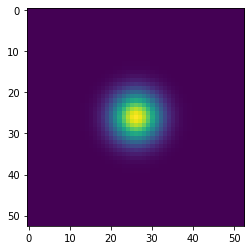

In [25]:
plt.imshow(im.array)
plt.show()

### Exercise 2: Drawing objects with `galsim`

With all of this information in hand, we can now get to the actual exercise!

1. Draw a Gaussian object with `galsim` using a scale of 0.1, `sigma=0.2`, and an image size `nx=ny=7`. Make a plot of the image.
2. Do the same as 1, but set the image size to `nx=ny=8`.
3. According to the code, `galsim` is supposed to be drawing the same object with the same grid size. Compare the plots from 1 and 2. What do you notice is different about the images? Why do you think this is the case?
4. For odd-sized images, what is the formula that relates where the center of the object lands to the size of the image?

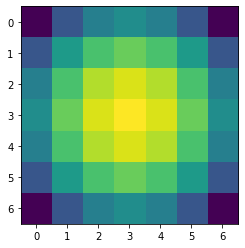

<function matplotlib.pyplot.show(close=None, block=None)>

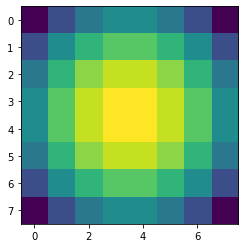

In [26]:
# do your work here!

obj1 = galsim.Gaussian(sigma=0.2)
im1 = obj.drawImage(scale=0.1, nx=7, ny=7)
plt.imshow(im1.array)
plt.show()

obj1 = galsim.Gaussian(sigma=0.2)
im1 = obj.drawImage(scale=0.1, nx=8, ny=8)
plt.imshow(im1.array)
plt.show

In [27]:
print(im1.array)

[[0.00140702 0.00144984 0.0014791  0.00149395 0.00149395 0.0014791
  0.00144984 0.00140702]
 [0.00144984 0.00149395 0.00152411 0.00153941 0.00153941 0.00152411
  0.00149395 0.00144984]
 [0.0014791  0.00152411 0.00155487 0.00157049 0.00157049 0.00155487
  0.00152411 0.0014791 ]
 [0.00149395 0.00153941 0.00157049 0.00158626 0.00158626 0.00157049
  0.00153941 0.00149395]
 [0.00149395 0.00153941 0.00157049 0.00158626 0.00158626 0.00157049
  0.00153941 0.00149395]
 [0.0014791  0.00152411 0.00155487 0.00157049 0.00157049 0.00155487
  0.00152411 0.0014791 ]
 [0.00144984 0.00149395 0.00152411 0.00153941 0.00153941 0.00152411
  0.00149395 0.00144984]
 [0.00140702 0.00144984 0.0014791  0.00149395 0.00149395 0.0014791
  0.00144984 0.00140702]]


3. 4. It seems in the second plot the central four pixels have the same value. The center of even pixel is 3.5 which makes 3 and 4 have the same value.

Given the results above, it is clear that even and odd sized images can cause counter intuitive differences in how `galsim` draws (or sometimes we say "renders") the objects surface brightness profile. To avoid ambiguities, we will stick with odd-sized images (e.g., 53 but not 52) in the rest of the tutorial.

### Exercise 3: Compute the moments of an object drawn with `galsim`

Let's combine the two skills we learned above to simulate an object with `galsim` and then compute the moments. This task will require us to understand what `(x,y)` values to assign to the different image locations from galsim. There are many ways we could go about this, but let's stick to something simple. Every `galsim` image has a `bounds` attribute:

In [28]:
obj = galsim.Gaussian(sigma=1)
im = obj.drawImage(nx=53, ny=53, scale=0.25)

print(dir(im.bounds))

['__add__', '__and__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_area', '_b', '_center', '_check_scalar', '_getinitargs', '_isdefined', '_parse_args', '_pos_class', 'area', 'center', 'expand', 'getXMax', 'getXMin', 'getYMax', 'getYMin', 'includes', 'isDefined', 'numpyShape', 'origin', 'shift', 'true_center', 'withBorder', 'xmax', 'xmin', 'ymax', 'ymin']


From the bounds attribute, we can extract the pixel grid locations:

In [29]:
print("xmin:", im.bounds.xmin)
print("xmax:", im.bounds.xmax)
print("ymin:", im.bounds.ymin)
print("ymax:", im.bounds.ymax)

xmin: 1
xmax: 53
ymin: 1
ymax: 53


The pixel grid locations are the integer indexes of the pixels as one would count them. These indexes are of course different from the $(x,y)$ coordinate values. Interestingly, `galsim` starts the pixel grid at 1 instead of starting things at 0 like python. In order to keep things consistent with python, we are always going to subtract 1 from the `galsim` pixel grid locations.

With this information, we can now generate the pixel grid locations for the image:

In [30]:
xmin_zero = im.bounds.xmin - 1
xmax_zero = im.bounds.xmax - 1
ymin_zero = im.bounds.ymin - 1
ymax_zero = im.bounds.ymax - 1

x, y = np.meshgrid(np.arange(xmin_zero, xmax_zero+1), np.arange(ymin_zero, ymax_zero+1))

Here note that we had to add 1 to the max value since `np.arange` follows the python convention of indexes from `i` to `j` spanning the values `i`, `i+1`, `i+2`, ..., `j-1`. We can verify this by examining the shape and the values of our arrays:

In [31]:
print(x.shape, y.shape)  # both are 53x53 which is the size of the image

(53, 53) (53, 53)


In [32]:
print((x.min(), x.max()), (y.min(), y.max()))  # both are (0, 52) since galsim went from 1 to 53 and we subtracted 1

(0, 52) (0, 52)


Finally, we have generated the pixel grid locations, but not the $(x,y)$ coordinates. To do that, we need to account for the grid spacing by multiplying:

In [33]:
x = x * 0.25  # this factor is what we passed for `scale` when drawing the image above
y = y * 0.25

We can print the range again to see the final results:

In [34]:
print((x.min(), x.max()), (y.min(), y.max()))

(0.0, 13.0) (0.0, 13.0)


With this information, do the following:

1. Use Galsim to draw a Gaussian via the following command `obj = galsim.Gaussian(sigma=2).shear(g1=0.1, g2=0.1)` and then draw this object on a grid that is 513 pixels on each side with a scale of 0.1.
2. Use the example above to compute the coordinates of the image pixels.
3. Use your new knowledge of object moments to compute all five of the moments defined previously.
4. Make a plot of the image. In this case, it may be easier to use the function `axs.imshow` since we have not computed the pixel coordinate edges. This command will always produce a plot in pixel grid locations.
5. What is different about the moments compared to the object we drew previously in terms of how the object looks and $M_{xy}$?

In [35]:
obj3 = galsim.Gaussian(sigma=2).shear(g1=0.1,g2=0.1)
im3 = obj3.drawImage(scale=0.1,nx=513,ny=513)

print("xmin:", im3.bounds.xmin)
print("xmax:", im3.bounds.xmax)
print("ymin:", im3.bounds.ymin)
print("ymax:", im3.bounds.ymax)

xmin_zero = im3.bounds.xmin - 1
xmax_zero = im3.bounds.xmax - 1
ymin_zero = im3.bounds.ymin - 1
ymax_zero = im3.bounds.ymax - 1

x, y = np.meshgrid(np.arange(xmin_zero, xmax_zero+1), np.arange(ymin_zero, ymax_zero+1))
x, y = x*0.1, y*0.1

print((x.min(), x.max()), (y.min(), y.max()))


xmin: 1
xmax: 513
ymin: 1
ymax: 513
(0.0, 51.2) (0.0, 51.2)


25.599998382354475 25.599998382354467 4.980358704498382 0.8158789763885115 3.3477801272836705


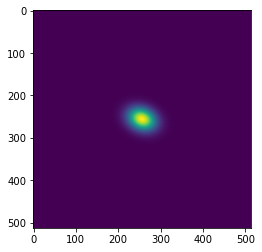

In [36]:

M_x,M_y,M_xx,M_xy,M_yy = get_moments(im3.array,x,y)
print(M_x, M_y, M_xx, M_xy, M_yy)
# M_xy is not zero because there is a correlation between x and y now

plt.imshow(im3.array)

## D. Galaxies, Shears, and Telescopes

Stepping back a bit, let's learn about how our Universe relates to the things we did above. 

**galaxies**: We introduced the concept of an object's surface brightness profile above, defined as the value of an image of the object at a given location $(x,y)$. Of course, in our Universe, objects don't actually follow the simple Gaussian profile we used above. Instead, galaxies form out of the gravitational collapse of dark matter and baryons into dark matter halos with galaxies at their centers. This process is exceedingly complex. For our work, instead of using the true surface brightness profile of a galaxy, we use simplified approximations, like a Gaussian profile. These approximations help us in multiple ways, including making our computations faster in some cases and making the results of our computations easier to understand. So, TL;DR, the surface brightness profiles we used above and below are simplified models for true galaxies that help make science easier to do. The issue of how we ensure our methods will work on galaxies the universe generates is a serious one, but something we won't discuss here.

**shears**: Now that we know what a surface brightness profile is and we have some moments computed, we are ready to think about shear. A *shear* is a specific mathematical transformation of a galaxy surface brightness profile. (Instead of coding this transformation up ourselves, we are going to have `galsim` do this for us. Yay!) This operation is highly relevant to our own Universe due to an effect called *weak gravitational lensing*. It turns out one of the foundational predictions of General Relativity is that the paths of light rays change in response to the presence of matter (e.g., us and everything else) near them. Weak gravitational lensing is this effect computed from all of the matter in the Universe along the line-of-sight from us to distant galaxies observed by telescopes. Fractionally, this effect is indeed very weak, causing a relative change of only 1% in the moments of the surface brightness profiles of distant galaxies. The goal of a shape measurement method is to extract the amplitude of this shear, which carries information about the matter along the line of sight and other properties of the Universe.

**telescopes**: After the light from a galaxy has passed through various structures along the line-of-sight, it enters our atmosphere and then the telescope. The combination of the atmosphere and the telescope blurs the image of the galaxy. We characterize this blurring through a quantity called the *point-spread function* or PSF. The PSF describes how light from a single, point-like object is spread out over the image. A galaxy is an extended object, which you can roughly think of as composed of an infinite number of points of light coming towards. To predict what the galaxy will look like after the atmosphere and telescope, we can take the surface brightness at each point on the galaxy, spread it out according to the PSF, and then deposit that spread out light onto our image. Mathematically, this operation is called a *convolution* and we say that the galaxy has been *convolved with the PSF*. Let's not worry about the mathematical details of convolutions for now. Instead, we will let `galsim` do them for us!

### Convolving a Galaxy with the PSF using `galsim`

Let's learn how to use `galsim` to convolve a galaxy with the PSF. First we make the galaxy and the psf:

In [37]:
import galsim
gal = galsim.Gaussian(sigma=1)
psf = galsim.Gaussian(sigma=0.5)

Now we can use the `galsim.Convolve` object to build the convolution like this:

In [38]:
observed_gal = galsim.Convolve(gal, psf)

Importantly, the convolved object has many of the same attributes as the original objects, including `.drawImage`.

In [39]:
print(dir(observed_gal))

['SED', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_adjust_offset', '_approxWavelength', '_calc_pn', '_calculate_flux_per_photon', '_calculate_nphotons', '_centroid', '_determine_wcs', '_drawKImage', '_drawReal', '_flux', '_flux_per_photon', '_get_new_bounds', '_gsparams', '_gsparams_opt', '_has_hard_edges', '_is_analytic_k', '_is_analytic_x', '_is_axisymmetric', '_kValue', '_lens', '_local_wcs', '_max_sb', '_maxk', '_negative_flux', '_noise', '_obj_list', '_parse_center', '_parse_offset', '_positive_flux', '_prepareDraw', '_propagate_gsparams', '_real_space', '_sbp', '_setup_i

### Exercise 4: Understanding Convolutions

For this exercise do the following:

1. Using a pixel grid with 53 pixels on each side and scale of 0.25, plot the PSF, galaxy and the convolution of the two. Use the objects in the example convolution we just discussed.
2. Measure the moments of each of the PSF, galaxy, and the convolution.
3. Plot the moment $M_{xx}$ of the convolved object as a function of the moment $M_{xx}$ of the PSF as you change the PSF size `sigma` from 0.5 to 1.0. What is the relationship between the two?
4. Repeat 3 but this time changing the size `sigma` of the galaxy from 1 to 2 and measuring $M_{xx}$ of the convolved object with respect to the moment $M_{xx}$ of the input galaxy. Before you make the plot, write down what do you expect to see and why?
5. Repeat 1 through 4, but this time using `gal = galsim.Exponential(half_light_radius=1)` and varying the `half_light_radius` instead of `sigma`. Do you see the same relationship? Why can you conclude about how this might approximately work in general?

#### Great job! If you've gotten here you can now simulate and draw useful combinations of objects and PSFs for weak lensing. Yay!

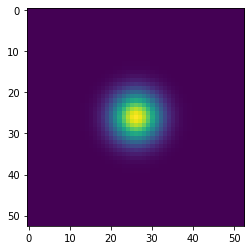

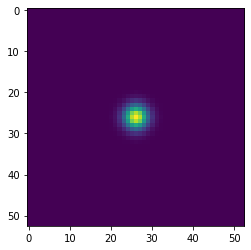

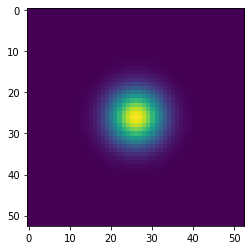

In [43]:
gal_im = gal.drawImage(scale=0.25,nx=53,ny=53)
psf_im = psf.drawImage(scale=0.25,nx=53,ny=53)
ob_im = observed_gal.drawImage(scale=0.25, nx=53, ny=53)

plt.imshow(gal_im.array)
plt.show()
plt.imshow(psf_im.array)
plt.show()
plt.imshow(ob_im.array)
plt.show()

In [45]:
print("xmin:", ob_im.bounds.xmin)
print("xmax:", ob_im.bounds.xmax)
print("ymin:", ob_im.bounds.ymin)
print("ymax:", ob_im.bounds.ymax)

xmin_zero = ob_im.bounds.xmin - 1
xmax_zero = ob_im.bounds.xmax - 1
ymin_zero = ob_im.bounds.ymin - 1
ymax_zero = ob_im.bounds.ymax - 1

x, y = np.meshgrid(np.arange(xmin_zero, xmax_zero+1), np.arange(ymin_zero, ymax_zero+1))
x, y = x*0.25, y*0.25

xmin: 1
xmax: 53
ymin: 1
ymax: 53


In [54]:
sigma_range = np.linspace(0.5,1,100)
M_xx_ob = []
M_xx_psf = []

for sigma_ in sigma_range:
    gal = galsim.Gaussian(sigma=1)
    psf = galsim.Gaussian(sigma=sigma_)
    observed_gal = galsim.Convolve(gal, psf)
    
    gal_im = gal.drawImage(scale=0.25,nx=53,ny=53)
    psf_im = psf.drawImage(scale=0.25,nx=53,ny=53)
    ob_im = observed_gal.drawImage(scale=0.25, nx=53, ny=53)

    M_xx_psf.append(get_moments(psf_im.array,x,y)[2])
    M_xx_ob.append(get_moments(ob_im.array,x,y)[2])

M_xx_ob = np.array(M_xx_ob)
M_xx_psf = np.array(M_xx_psf)

Text(0, 0.5, 'M_xx observed')

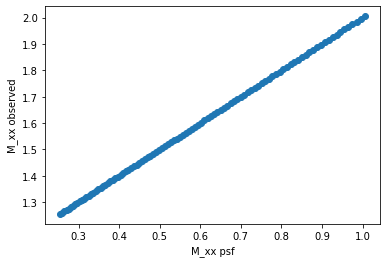

In [55]:
plt.scatter(M_xx_psf,M_xx_ob)
plt.xlabel("M_xx psf")
plt.ylabel("M_xx observed")

They look pretty linear.

In [57]:
sigma_range = np.linspace(1,2,100)
M_xx_ob = []
M_xx_gal = []

for sigma_ in sigma_range:
    gal = galsim.Gaussian(sigma=sigma_)
    psf = galsim.Gaussian(sigma=0.5)
    observed_gal = galsim.Convolve(gal, psf)
    
    gal_im = gal.drawImage(scale=0.25,nx=53,ny=53)
    psf_im = psf.drawImage(scale=0.25,nx=53,ny=53)
    ob_im = observed_gal.drawImage(scale=0.25, nx=53, ny=53)

    M_xx_gal.append(get_moments(gal_im.array,x,y)[2])
    M_xx_ob.append(get_moments(ob_im.array,x,y)[2])

M_xx_ob = np.array(M_xx_ob)
M_xx_gal = np.array(M_xx_gal)

In [59]:
# I expect them to be of a linear relation

Text(0, 0.5, 'M_xx observed')

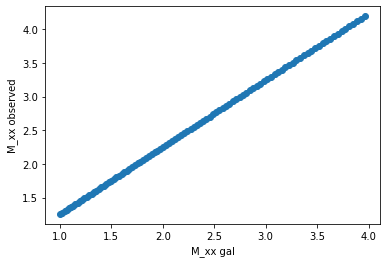

In [60]:
plt.scatter(M_xx_gal,M_xx_ob)
plt.xlabel("M_xx gal")
plt.ylabel("M_xx observed")

In [62]:
import galsim
gal = galsim.Exponential(half_light_radius=1)
psf = galsim.Exponential(half_light_radius=0.5)

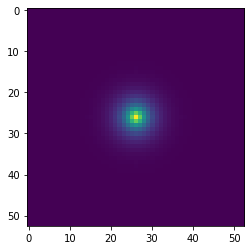

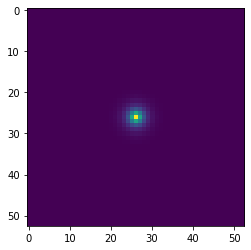

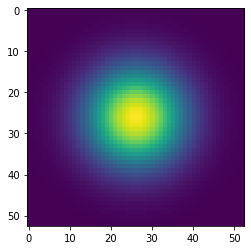

In [63]:
gal_im = gal.drawImage(scale=0.25,nx=53,ny=53)
psf_im = psf.drawImage(scale=0.25,nx=53,ny=53)
ob_im = observed_gal.drawImage(scale=0.25, nx=53, ny=53)

plt.imshow(gal_im.array)
plt.show()
plt.imshow(psf_im.array)
plt.show()
plt.imshow(ob_im.array)
plt.show()

In [64]:
print("xmin:", ob_im.bounds.xmin)
print("xmax:", ob_im.bounds.xmax)
print("ymin:", ob_im.bounds.ymin)
print("ymax:", ob_im.bounds.ymax)

xmin_zero = ob_im.bounds.xmin - 1
xmax_zero = ob_im.bounds.xmax - 1
ymin_zero = ob_im.bounds.ymin - 1
ymax_zero = ob_im.bounds.ymax - 1

x, y = np.meshgrid(np.arange(xmin_zero, xmax_zero+1), np.arange(ymin_zero, ymax_zero+1))
x, y = x*0.25, y*0.25

xmin: 1
xmax: 53
ymin: 1
ymax: 53


In [65]:
sigma_range = np.linspace(0.5,1,100)
M_xx_ob = []
M_xx_psf = []

for sigma_ in sigma_range:
    gal = galsim.Exponential(half_light_radius=1)
    psf = galsim.Exponential(half_light_radius=sigma_)
    observed_gal = galsim.Convolve(gal, psf)
    
    gal_im = gal.drawImage(scale=0.25,nx=53,ny=53)
    psf_im = psf.drawImage(scale=0.25,nx=53,ny=53)
    ob_im = observed_gal.drawImage(scale=0.25, nx=53, ny=53)

    M_xx_psf.append(get_moments(psf_im.array,x,y)[2])
    M_xx_ob.append(get_moments(ob_im.array,x,y)[2])

M_xx_ob = np.array(M_xx_ob)
M_xx_psf = np.array(M_xx_psf)

Text(0, 0.5, 'M_xx observed')

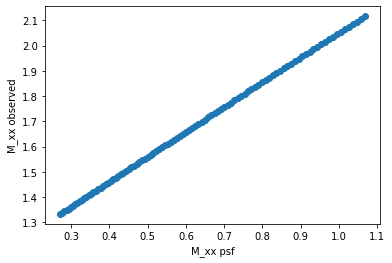

In [66]:
plt.scatter(M_xx_psf,M_xx_ob)
plt.xlabel("M_xx psf")
plt.ylabel("M_xx observed")

They look pretty linear.

In [67]:
sigma_range = np.linspace(1,2,100)
M_xx_ob = []
M_xx_gal = []

for sigma_ in sigma_range:
    gal = galsim.Exponential(half_light_radius=sigma_)
    psf = galsim.Exponential(half_light_radius=0.5)
    observed_gal = galsim.Convolve(gal, psf)
    
    gal_im = gal.drawImage(scale=0.25,nx=53,ny=53)
    psf_im = psf.drawImage(scale=0.25,nx=53,ny=53)
    ob_im = observed_gal.drawImage(scale=0.25, nx=53, ny=53)

    M_xx_gal.append(get_moments(gal_im.array,x,y)[2])
    M_xx_ob.append(get_moments(ob_im.array,x,y)[2])

M_xx_ob = np.array(M_xx_ob)
M_xx_gal = np.array(M_xx_gal)

In [68]:
# I expect them to be of a linear relation

Text(0, 0.5, 'M_xx observed')

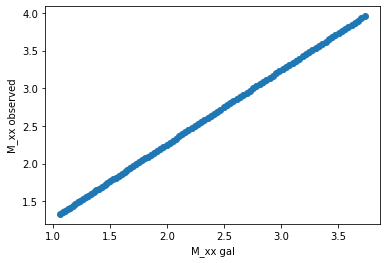

In [69]:
plt.scatter(M_xx_gal,M_xx_ob)
plt.xlabel("M_xx gal")
plt.ylabel("M_xx observed")

Yes I see the same relationship. M_xx observed is bilinear to M_xx gal and M_xx psf. Variance is itself a convolution? 